# 感知器模型流程
- 1、初始化w，b
- 2、遍历所有训练数据在训练集中选出误分类点：
- - 如果y != sign(wx+b) 或者 y*(wx+b)<=0 则为误分类
- - 根据误分类点计算：w_new = w_old - alpha * 对w的梯度，b_new = b_old - alpha * 对b的梯度
- 3、直到没有误分类点或者达到迭代次数停止迭代

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
p_x = np.array([[4.0, 2.0], [3.0, 2.0], [2.5, 1.0], [2.0, 1.0]])
y = np.array([1, 1, -1, -1])

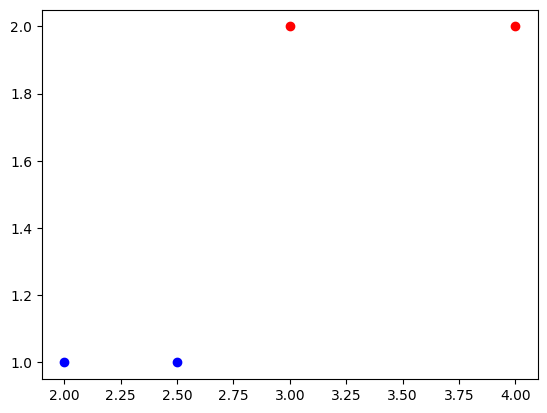

In [3]:
for i in range(len(p_x)):
    if y[i] == 1:
        plt.plot(p_x[i][0], p_x[i][1], 'ro')
    else:
        plt.plot(p_x[i][0], p_x[i][1], 'bo')
plt.show()

In [4]:
# 初始化w和b
w = np.array([0.4, 0.4])
b = 0.5
# 学习率
alpha = 0.1
# 做100次迭代 选出分类错误的进行迭代 SGD/MBGD
for i in range(100):
    choice = -1  ### 选择误分类点
    # error_list = []
    for j in range(len(p_x)):
        ## 判断误分类点
        if y[j] != np.sign(np.dot(w, p_x[j]) + b):
            choice = j
            # error_list.append(j)
            ## 这里使用SGD，所以找到一个误分类点就可以更新一次
            break
    ## 如果没有误分类点。停止迭代
    if choice == -1:
        break
    w = w + alpha * y[choice] * p_x[choice]
    b = b + alpha * y[choice] * 1

    # if len(error_list) == 0:
    #     break
    # for item in error_list:
    #     w += alpha * y[item] * p_x[item]
    #     b += alpha * y[item]

print(i)
print('w:{}\nb:{}'.format(w, b))

31
w:[-0.15  0.6 ]
b:-0.4


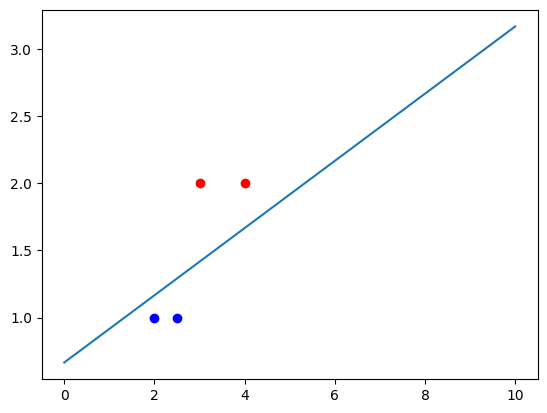

In [6]:
for i in range(len(p_x)):
    if y[i] == 1:
        plt.plot(p_x[i][0], p_x[i][1], 'ro')
    else:
        plt.plot(p_x[i][0], p_x[i][1], 'bo')

## 画出分割直线  ## w1*x1+w2*x2+b = 0 ==> x2 = -(w1*x1+b)/w2
line_x = [0, 10]
line_y = [0, 0]

for i in range(len(line_x)):
    # todo:w[1] == 0
    if w[1] != 0:
        line_y[i] = (-w[0] * line_x[i] - b) / w[1]
    else:
        line_x = [-b / w[0], -b / w[0]]
        line_y = [0, 1]

plt.plot(line_x, line_y)
plt.show()

# 感知器模型分类 model = np.sign(np.dot(w, x) + b)